# ESTRATEGIA LOW BETA

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 9 y 10__

__Gestión de Activos y Carteras__

__CUNEF__

Esta estrategia de optimización de carteras es la estrategia Low Beta. A partir de los betas de esta estrategia, elegiremos a las empresas que tengan este valor más pequeño en comparación con las que si lo tengan más grande.
La beta es la sensibilidad al movimiento de un índice, haremos esta beta neutral cogiendo en igual cantidad la parte alcista y bajista. 

Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo.
El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [1]:
import datetime as datetime
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/mariacarrasco/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Importamos los datos que se van a analizar en nuestra estrategia.

In [2]:
datos = pd.read_excel('datos.xlsx')
datos = datos.set_index('Symbol')
datos.head()

,Name,Price,Currency,FX Chang,Sector,Country,Rentab 1Y,Volat 30d,Volat 360d,EV_TO_T12M_EBITDA,EQY_DVD_YLD_12M,NET_OPERATING_ASSETS,RETURN_ON_INV_CAPITAL,EQY_BETA,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT,NEWS_SENTIMENT
Symbol,,,,,,,,,,,,,,,,,,,,
NESN SW Equity,NESTLE SA-REG,101.32,CHF,0.9402,Food,SWITZERLAND,0.018599,0.237874,0.199546,0.166487,0.026648,79763.000000,0.138397,0.812534,3.851852,27,13,1,0.0,0.382784
ROG SW Equity,ROCHE HOLDING AG-GENUSSCHEIN,332.10,CHF,0.9402,Pharmaceuticals,SWITZERLAND,0.221180,0.256552,0.224647,0.128229,0.027100,39591.000000,0.279033,1.031748,3.687500,32,16,5,0.0,0.034268
NOVN SW Equity,NOVARTIS AG-REG,81.18,CHF,0.9402,Pharmaceuticals,SWITZERLAND,-0.082919,0.259980,0.231213,0.150534,0.036339,73355.000000,0.086807,1.073373,3.827586,29,16,4,0.0,0.261707
BATS LN Equity,BRITISH AMERICAN TOBACCO PLC,3275.00,GBp,1.1150,Agriculture,BRITAIN,0.097336,0.341078,0.326400,0.110997,0.062550,106877.000000,0.051704,1.123634,4.473684,19,14,0,0.0,0.112235
FP FP Equity,TOTAL SA,34.04,EUR,1.0000,Oil&Gas,FRANCE,-0.288610,0.523668,0.397920,0.051470,0.077556,131091.815834,0.041398,1.290288,3.466667,30,10,3,0.0,0.000000


Además importamos los datos históricos por separado de cada activo.

In [3]:
historicos = pd.read_excel('historico.xlsx')
historicos.head()

,Date,NESN SW Equity,ROG SW Equity,NOVN SW Equity,BATS LN Equity,FP FP Equity,RDSA LN Equity,SAN FP Equity,SIE GY Equity,RDSB LN Equity,...,AXP UN Equity,WMT UN Equity,MSFT UW Equity,MRK UN Equity,NKE UN Equity,VZ UN Equity,KO UN Equity,INTC UW Equity,CSCO UW Equity,PFE UN Equity
0,2012-04-18,56.65,162.9,44.82,3191.5,37.320,2154.0,56.25,68.937,2208.0,...,58.04,62.06,31.14,38.40,27.6400,37.66,37.085,27.94,20.06,22.45
1,2012-04-19,57.20,164.4,45.04,3224.0,36.335,2122.5,55.78,67.697,2183.0,...,57.57,61.75,31.03,38.36,27.4025,38.15,36.910,27.69,19.92,22.32
2,2012-04-20,57.10,168.7,45.26,3244.0,36.450,2136.5,56.67,68.491,2202.5,...,57.45,62.45,32.42,38.73,27.6925,38.73,37.065,27.60,19.91,22.56
3,2012-04-23,55.50,166.2,45.00,3213.5,35.560,2110.0,55.57,66.766,2179.5,...,57.32,59.54,32.12,38.27,27.4375,38.57,36.845,27.45,19.68,22.38
4,2012-04-24,55.50,166.5,44.33,3157.0,35.910,2130.0,56.59,67.648,2200.5,...,57.63,57.77,31.92,38.27,26.6875,39.50,37.060,27.31,19.42,22.63


In [4]:
historicos['Date'] = pd.to_datetime(historicos['Date'], format="%Y-%m-%d")
historicos = historicos.set_index('Date')
historicos.tail()

,NESN SW Equity,ROG SW Equity,NOVN SW Equity,BATS LN Equity,FP FP Equity,RDSA LN Equity,SAN FP Equity,SIE GY Equity,RDSB LN Equity,BAYN GY Equity,...,AXP UN Equity,WMT UN Equity,MSFT UW Equity,MRK UN Equity,NKE UN Equity,VZ UN Equity,KO UN Equity,INTC UW Equity,CSCO UW Equity,PFE UN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-12,106.18,348.60,83.82,3152.0,32.315,1311.6,91.01,87.86,1261.2,58.42,...,83.14,123.78,182.51,77.19,88.26,55.46,44.82,58.39,43.22,37.36
2020-05-13,105.36,349.90,83.10,3058.0,31.090,1265.4,89.49,86.10,1223.4,57.42,...,78.03,123.71,179.75,77.89,86.02,54.85,43.94,57.74,41.95,37.05
2020-05-14,103.14,347.80,81.00,2989.5,30.810,1204.0,88.18,84.15,1158.4,55.76,...,83.81,123.42,180.53,80.05,86.55,54.91,43.70,59.08,43.85,37.92
2020-05-15,103.88,354.05,81.16,3049.5,30.860,1228.0,87.22,86.14,1175.6,56.75,...,82.22,125.94,183.16,79.78,86.99,54.71,43.26,58.28,44.27,37.76
2020-05-18,105.08,351.55,82.55,3097.0,33.145,1330.0,87.56,91.37,1271.8,60.36,...,88.41,127.66,184.91,79.72,91.04,55.72,44.97,59.92,45.06,38.07


Obtenemos el índice MSCI.

In [5]:
MSCI = pdr.get_data_yahoo('MSCI', 
                          start=datetime.datetime(2012, 4, 18), 
                          end=datetime.datetime(2020, 5, 18))
MSCI.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-18,36.090000,35.619999,36.040001,35.709999,263400.0,33.289604
2012-04-19,36.009998,35.290001,35.799999,35.500000,354700.0,33.093830
2012-04-20,35.910000,35.419998,35.700001,35.419998,347400.0,33.019268
2012-04-23,35.200001,34.650002,35.029999,35.139999,441700.0,32.758232
2012-04-24,35.610001,35.119999,35.150002,35.590000,500200.0,33.177738


In [6]:
MSCI = pd.DataFrame(MSCI['Close'])
MSCI['Rentabilidad'] = MSCI.Close.pct_change() * 100
MSCI.Rentabilidad = MSCI.Rentabilidad.fillna(0)

In [7]:
MSCI['Buy&Hold'] = 100

for i in range(1, len(MSCI)):
    
    MSCI['Buy&Hold'].iloc[i] = MSCI['Buy&Hold'].iloc[i-1]*(1 + (MSCI.Rentabilidad.iloc[i]/100))

/Users/mariacarrasco/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Seleccionamos los ratios contables que se van a utilizar (EQY_BETA) para crear el ranking y los pesos ya que, en esta estrategia, son los únicos que se deben aplicar. Para ello, creamos un nuevo dataframe que será utilizado de ahora en adelante como los datos originales.

In [8]:
betas = datos[['EQY_BETA']]
betas.index = datos.index
betas.head()

,EQY_BETA
Symbol,
NESN SW Equity,0.812534
ROG SW Equity,1.031748
NOVN SW Equity,1.073373
BATS LN Equity,1.123634
FP FP Equity,1.290288


In [9]:
ranking = betas.rank(ascending=False) 
ranking.head()

,EQY_BETA
Symbol,
NESN SW Equity,133.0
ROG SW Equity,60.0
NOVN SW Equity,47.0
BATS LN Equity,32.0
FP FP Equity,12.0


Seleccionamos unos pesos para el largo y corto plazo y se lo aplicamos a cada variable en función del ranking anterior. Ponemos mayor peso en el largo en vez de en el corto, ya que se obtienen mejores resultados.

In [10]:
corto = 20.0
largo = 20.0
peso_corto = -1
peso_largo = 1

In [11]:
cuenta = datos.Name.count()
cuenta

175

In [12]:
lista = []
for i in ranking['EQY_BETA']:
    m = []
    if i <= largo: 
        pesos = peso_largo/largo
        m.append(pesos)
    elif i >= (cuenta + 1 - corto): 
        pesos = peso_corto/corto
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista.extend(m)
    weights = pd.DataFrame(lista, columns = ['EQY_BETA'])

In [13]:
weights['Symbol'] = datos.index
weights = weights.set_index('Symbol')
weights.head()

,EQY_BETA
Symbol,
NESN SW Equity,0.00
ROG SW Equity,0.00
NOVN SW Equity,0.00
BATS LN Equity,0.00
FP FP Equity,0.05


Como se ha mencionado anteriormente son las empresas con menor beta las que van a ser preferidas en comparación con las de mayor beta.

## Datos finales de la estrategia

Para la parte final de este estudio, debemos tener en cuenta los datos históricos de cada activo importados al principio del análisis. Estimamos el cambio de porcentaje de cada activo para obtener las renntabilidades diarias de cada una y así obtener los datos finales con los que generaremos la cartera óptima.

In [14]:
df = historicos.pct_change().dropna()
df.head()

,NESN SW Equity,ROG SW Equity,NOVN SW Equity,BATS LN Equity,FP FP Equity,RDSA LN Equity,SAN FP Equity,SIE GY Equity,RDSB LN Equity,BAYN GY Equity,...,AXP UN Equity,WMT UN Equity,MSFT UW Equity,MRK UN Equity,NKE UN Equity,VZ UN Equity,KO UN Equity,INTC UW Equity,CSCO UW Equity,PFE UN Equity
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-19,0.009709,0.009208,0.004909,0.010183,-0.026393,-0.014624,-0.008356,-0.017987,-0.011322,-0.002476,...,-0.008098,-0.004995,-0.003532,-0.001042,-0.008593,0.013011,-0.004719,-0.008948,-0.006979,-0.005791
2012-04-20,-0.001748,0.026156,0.004885,0.006203,0.003165,0.006596,0.015956,0.011729,0.008933,0.025365,...,-0.002084,0.011336,0.044795,0.009645,0.010583,0.015203,0.004199,-0.003250,-0.000502,0.010753
2012-04-23,-0.028021,-0.014819,-0.005745,-0.009402,-0.024417,-0.012403,-0.019411,-0.025186,-0.010443,-0.043915,...,-0.002263,-0.046597,-0.009254,-0.011877,-0.009208,-0.004131,-0.005936,-0.005435,-0.011552,-0.007979
2012-04-24,0.000000,0.001805,-0.014889,-0.017582,0.009843,0.009479,0.018355,0.013210,0.009635,0.014025,...,0.005408,-0.029728,-0.006227,0.000000,-0.027335,0.024112,0.005835,-0.005100,-0.013211,0.011171
2012-04-25,0.002703,0.006006,-0.003835,-0.002534,0.008772,-0.000939,0.006362,0.010318,-0.005226,0.021497,...,0.022211,-0.007097,0.008772,0.004181,0.021358,-0.000506,0.010928,0.020139,0.003605,0.011047


In [26]:
def ratios(beta, weights):
    '''
        returns = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(beta)):
        
        value = resultados[i-1] * (1 + (beta.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['Beta'])  
    final.set_index(beta.index, inplace=True)
        
    return final

En el dataframe a continuación, podemos observar el resultado de esta estrategia y la graficamos a continuación. Gráficamente, y en comparación con el índice MSCI, se observa que se ha conseguido obtener una estrategia neutral al mercado.

In [27]:
final = ratios(df, weights)
final

,Beta
Date,
2012-04-19,100.000000
2012-04-20,100.375642
2012-04-23,100.675748
2012-04-24,100.510259
2012-04-25,100.730215
...,...
2020-05-12,121.612138
2020-05-13,122.876196
2020-05-14,122.149904


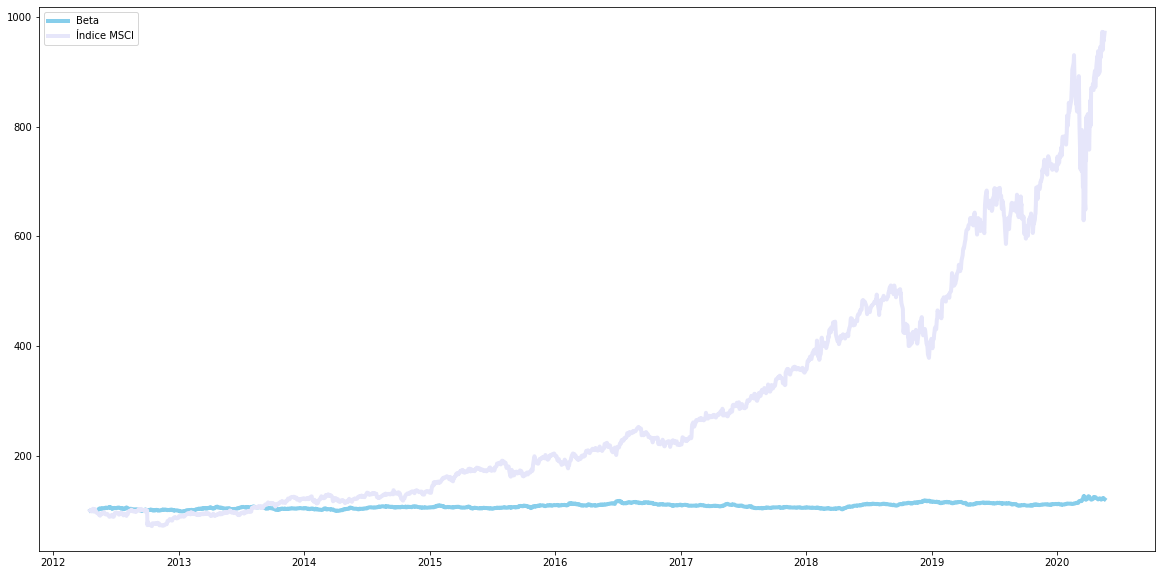

In [28]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['Beta'], marker='', markerfacecolor='blue', markersize=12, color='skyblue', 
         linewidth=4, label ='Beta')
plt.plot(MSCI["Buy&Hold"], marker='', markerfacecolor='lavender', markersize=12, color='lavender', 
         linewidth=4, label ='Índice MSCI')
plt.legend()

Podemos concluir que la selección de pesos para los datos en cuestión es correcta (al aplicar el inverso, es decir, mayor peso al corto que al largo, los resultados eran peores, había más volatilidad). 

In [30]:
final.to_csv('Estrategia_Low_Beta_final.csv')